# Introduction Pandas for Python 102



Pandas เป็นแพ็คเกจ Python แบบโอเพ่นซอร์สยอดนิยมสำหรับวิทยาศาสตร์ข้อมูล วิศวกรรมข้อมูล การวิเคราะห์ สำหรับจัดการ dataframe ที่ถูกออกแบบมาเพื่อการจัดการและวิเคราะห์ข้อมูล โดยเฉพาะข้อมูลที่อยู่ในรูปแบบของตาราง (tabular data) คล้ายกับข้อมูลใน Excel หรือ SQL tables

pip install pandas


In [2]:
import numpy as np
import pandas as pd

__________________________________________________________________________________________________________________________________________________________________________________

#### 1.     Object Creation


In [2]:
# 1.1 Series 

s = pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
#  1.2 dataframe

df1 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df1

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [5]:
df1.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

##### คำสั่งอื่น ๆ 
```
df1.<TAB>
df1.A                  df1.bool                  df1.add                df1.C
df1.abs                df1.boxplot               df1.add_prefix         df1.clip
df1.add_suffix         df1.columns               df1.align              df1.copy
df1.all                df1.count                 df1.any                df1.combine
df1.append             df1.D                     df1.apply              df1.describe
df1.applymap           df1.diff                  df1.B                  df1.duplicated
```

__________________________________________________________________________________________________________________________________________________________________________________

#### 2.     Viewing Data

Use DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively:

In [47]:
# Object Creation
dates = pd.date_range("20130101", periods=6)
df2 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [48]:
df2.head()

,A,B,C,D
2013-01-01,0.852095,0.353759,-1.382915,0.337272
2013-01-02,0.296657,-0.637354,-0.950048,-1.701628
2013-01-03,-0.448944,1.616287,0.494226,-0.480939
2013-01-04,-3.556519,-0.987507,1.248577,-1.836192
2013-01-05,-1.159425,0.703133,-0.504842,1.738985


In [615]:
'''
- df.dtypes แสดงประเภทข้อมูลของทุกคอลัมน์
- df['column_name'].dtype แสดงประเภทข้อมูลของคอลัมน์เฉพาะ
- df.info() แสดงข้อมูลสรุปรวมถึงประเภทข้อมูลของแต่ละคอลัมน์
'''

df2.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [22]:
#Display the DataFrame.index or DataFrame.columns:
df2.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df2.columns

In [20]:
df2.to_numpy()

array([[ 1.10456666,  0.16925691, -1.64667262, -0.3727517 ],
       [-0.63127099, -0.46535542, -0.01620065,  0.17117057],
       [-0.03917842, -0.61422125, -1.36067685,  0.31581883],
       [ 0.80159736,  2.95223167, -2.10799018, -0.48453169],
       [-0.46843792,  0.7512277 ,  0.35269687,  0.28890004],
       [ 0.94395605, -0.79846103,  0.65017071,  0.59671775]])

###### การใช้ DataFrame.to_numpy() ใน pandas คือการแปลงข้อมูลใน DataFrame ให้เป็นอาร์เรย์ของ NumPy โดยข้อมูลทั้งหมดจะถูกจัดเก็บในรูปแบบเดียวกัน (dtype) ซึ่งเหมาะกับการประมวลผลเชิงคณิตศาสตร์และการทำงานกับไลบรารีที่ต้องการข้อมูลในรูปแบบ NumPy หาก DataFrame มีข้อมูลหลากหลายประเภท การแปลงอาจใช้เวลามากขึ้นเพราะต้องปรับให้เป็นรูปแบบเดียวกัน เช่น ประเภท object แต่ถ้าข้อมูลใน DataFrame มีประเภทเดียวกัน เช่น ตัวเลข การแปลงจะรวดเร็วและไม่ต้องคัดลอกข้อมูลใหม่

In [21]:
# describe() shows a quick statistic summary of your data:
df2.describe()

In [ ]:
# สลับคอลัมน์ กับ แถว
df2.T

In [39]:
# เรียงข้อมูล Sort โดย ascending=True คือจากน้อยไปมาก False จากมากไปน้อย
df2.sort_index(ascending=True)

,A,B,C,D
2013-01-01,1.104567,0.169257,-1.646673,-0.372752
2013-01-02,-0.631271,-0.465355,-0.016201,0.171171
2013-01-03,-0.039178,-0.614221,-1.360677,0.315819
2013-01-04,0.801597,2.952232,-2.107990,-0.484532
2013-01-05,-0.468438,0.751228,0.352697,0.288900
2013-01-06,0.943956,-0.798461,0.650171,0.596718


In [26]:
df2.sort_values(by='B')

,A,B,C,D
2013-01-06,0.943956,-0.798461,0.650171,0.596718
2013-01-03,-0.039178,-0.614221,-1.360677,0.315819
2013-01-02,-0.631271,-0.465355,-0.016201,0.171171
2013-01-01,1.104567,0.169257,-1.646673,-0.372752
2013-01-05,-0.468438,0.751228,0.352697,0.288900
2013-01-04,0.801597,2.952232,-2.107990,-0.484532


In [25]:
df2.sort_values(by='B',ascending=False)

,A,B,C,D
2013-01-04,0.801597,2.952232,-2.107990,-0.484532
2013-01-05,-0.468438,0.751228,0.352697,0.288900
2013-01-01,1.104567,0.169257,-1.646673,-0.372752
2013-01-02,-0.631271,-0.465355,-0.016201,0.171171
2013-01-03,-0.039178,-0.614221,-1.360677,0.315819
2013-01-06,0.943956,-0.798461,0.650171,0.596718


__________________________________________________________________________________________________________________________________________________________________________________

#### 3.     Selection

การเลือกข้อมูล (selection) จาก DataFrame ใน pandas สามารถทำได้หลายวิธีตามความต้องการ การเลือกและตั้งค่า (selecting and setting) จะทำได้อย่างเป็นธรรมชาติและเหมาะกับการทำงานแบบโต้ตอบ (interactive work) แต่สำหรับโค้ดที่ใช้ในการผลิต (production code) เราขอแนะนำให้ใช้วิธีการเข้าถึงข้อมูลที่ปรับแต่งแล้วของ pandas เช่น 

- DataFrame[['Col1','Col2']] = ใช้สำหรับดึงข้อมูลตามป้ายกำกับคอลัมน์
- DataFrame.loc() = ใช้สำหรับเลือกข้อมูลโดยอิงจากป้ายกำกับ (label) ของแถวและคอลัมน์เหมาะเมื่อคุณต้องการเลือกข้อมูลโดยใช้ชื่อของแถวหรือคอลัมน์ที่ชัดเจน
- DataFrame.iloc() = ใช้สำหรับเลือกข้อมูลโดยอิงจากตำแหน่งเชิงตัวเลข (index) ของแถวและคอลัมน์ เหมาะเมื่อคุณต้องการเลือกข้อมูลโดยอ้างอิงจากตำแหน่งที่แน่นอน

In [49]:
# สร้าง DataFrame
data = {
    'Employee Name': ['John Doe', 'Jane Smith', 'Emily Davis', 'Michael Brown', 'Jessica Lee'],
    'Position': ['Manager', 'Software Engineer', 'Data Scientist', 'HR Specialist', 'Marketing Coordinator'],
    'Age': [45, 30, 35, 29, 42],
    'Salary': [85000, 95000, 105000, 60000, 75000],
    'Years at Company': [10, 4, 7, 2, 12]
}

df3 = pd.DataFrame(data)
df3

,Employee Name,Position,Age,Salary,Years at Company
0,John Doe,Manager,45,85000,10
1,Jane Smith,Software Engineer,30,95000,4
2,Emily Davis,Data Scientist,35,105000,7
3,Michael Brown,HR Specialist,29,60000,2
4,Jessica Lee,Marketing Coordinator,42,75000,12


##### 3.1     DataFrame[['Col1','Col2']] 
เป็นวิธีการเลือกคอลัมน์เฉพาะจาก DataFrame และสร้าง DataFrame ใหม่ที่ประกอบด้วยคอลัมน์เหล่านั้น

In [123]:
# เลือกข้อมูลตาม คอลัมน์
select_col1_col2 = df3[['Employee Name','Position']]
select_col1_col2

,Employee Name,Position
0,John Doe,Manager
1,Jane Smith,Software Engineer
2,Emily Davis,Data Scientist
3,Michael Brown,HR Specialist
4,Jessica Lee,Marketing Coordinator


##### 3.2     DataFrame.loc() 
เป็นวิธีการเข้าถึงและแก้ไขข้อมูลใน DataFrame โดยใช้ป้ายกำกับ (label) ของแถวและคอลัมน์ เหมาะสำหรับการเลือกข้อมูลเมื่อคุณรู้ชื่อ (label) ของแถวหรือคอลัมน์ที่ต้องการใช้งาน

- เข้าถึงแถวหรือคอลัมน์: ใช้ DataFrame.loc[row_label, column_label] เพื่อเข้าถึงค่าที่อยู่ในแถวและคอลัมน์ที่ระบุ
- เลือกหลายแถวหรือหลายคอลัมน์: คุณสามารถเลือกหลายแถวหรือคอลัมน์ได้โดยใช้รายการ (list) ของป้ายกำกับ
- เลือกแถวทั้งหมดหรือคอลัมน์ทั้งหมด: ใช้ : เพื่อเลือกแถวทั้งหมดหรือคอลัมน์ทั้งหมด

In [ ]:
# 1.เลือกแถวที่มีชื่อพนักงาน "Jane Smith" และดูตำแหน่งของเขา
position_of_jane = df3.loc[df['Employee Name'] == 'Jane Smith', 'Position']
print(position_of_jane)

In [ ]:
# 2.เลือกข้อมูลพนักงานที่มีอายุเกิน 40 ปี และแสดงเฉพาะชื่อและเงินเดือน:
senior_employees = df3.loc[df['Age'] > 40, ['Employee Name', 'Salary']]
print(senior_employees)

##### 3.3     DataFrame.iloc()
เป็นวิธีการเข้าถึงและแก้ไขข้อมูลใน DataFrame โดยอ้างอิงจากตำแหน่งเชิงตัวเลข (index) ของแถวและคอลัมน์ เหมาะสำหรับการเลือกข้อมูลเมื่อคุณรู้ตำแหน่งเชิงตัวเลขของแถวหรือคอลัมน์ที่ต้องการใช้งาน
- เข้าถึงแถวหรือคอลัมน์: ใช้ DataFrame.iloc[row_index, column_index] เพื่อเข้าถึงค่าที่ตำแหน่งแถวและคอลัมน์ที่ระบุ (ตำแหน่งเริ่มต้นจาก 0)
- เลือกหลายแถวหรือหลายคอลัมน์: คุณสามารถเลือกหลายแถวหรือคอลัมน์ได้โดยใช้ช่วงตัวเลข (slice)
- เลือกแถวทั้งหมดหรือคอลัมน์ทั้งหมด: ใช้ : เพื่อเลือกแถวทั้งหมดหรือคอลัมน์ทั้งหมด

In [ ]:
#เลือกค่าของแถวที่ 2 และคอลัมน์ที่ 3 (เงินเดือนของ "Emily Davis"):
salary_of_emily = df3.iloc[2, 3]
print(salary_of_emily)

In [ ]:
#เลือกข้อมูลแถวแรกและคอลัมน์แรก (ชื่อของ "John Doe"):
first_employee_name = df3.iloc[0, 0]
print(first_employee_name)

In [ ]:
#เลือกข้อมูลทั้งหมดของแถวที่ 3 (ข้อมูลของ "Michael Brown"):
michael_info = df3.iloc[3, :]
print(michael_info)

__________________________________________________________________________________________________________________________________________________________________________________

#### 4.     Missing Data

การจัดการกับ Missing Data (ข้อมูลที่ขาดหายไป) เป็นเรื่องสำคัญมากใน Pandas เนื่องจากในหลายกรณีที่เราทำงานกับข้อมูลจริง จะมีค่าที่ขาดหายไปหรือข้อมูลไม่สมบูรณ์ ซึ่งอาจเกิดจากหลายสาเหตุ เช่น ข้อมูลไม่ได้ถูกบันทึกในบางช่วงเวลา, ข้อมูลผิดพลาด, หรือข้อมูลบางส่วนไม่สามารถรวบรวมได้

Pandas มีฟังก์ชันและวิธีการหลายอย่างในการจัดการกับ Missing Data โดยค่า missing data ใน Pandas จะแทนด้วย NaN (Not a Number)

In [99]:
data = {
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, 2, 3, 4],
    'C': [1, np.nan, np.nan, 4],
    'D': [1, 2, 3, 4]
}

df4 = pd.DataFrame(data)
df4

,A,B,C,D
0,1.0,NaN,1.0,1
1,2.0,2.0,NaN,2
2,NaN,3.0,NaN,3
3,4.0,4.0,4.0,4


##### 4.1 วิธีการตรวจสอบ Missing Data

In [68]:
# ตรวจสอบข้อมูลว่า มีข้อมูลที่ขาดหายไปหรือไม่
df_isna= df4.isna()
df_isna

,A,B,C,D
0,False,True,False,False
1,False,False,True,False
2,True,False,True,False
3,False,False,False,False


In [69]:
# ตรวจสอบข้อมูล ที่ไม่มีข้อมูลที่ขาดหายไป
df_notna = df4.notna()
df_notna

,A,B,C,D
0,True,False,True,True
1,True,True,False,True
2,False,True,False,True
3,True,True,True,True


In [70]:
# นับจำนวนข้อมูลที่หายไป
df_isna_sum = df4.isna().sum()
df_isna_sum

A    1
B    1
C    2
D    0
dtype: int64

##### 4.2 วิธีการจัดการกับ Missing Data

##### - 4.2.1 ลบ Missing Data: คุณสามารถลบแถวหรือคอลัมน์ที่มี Missing Data ออกได้ด้วย dropna()

In [65]:
# ลบ Missing Data: คุณสามารถลบแถวหรือคอลัมน์ที่มี Missing Data ออกได้ด้วย dropna()

# ลบแถว
df_dropna_row = df4.dropna(axis=0)
df_dropna_row

,A,B,C,D
3,4.0,4.0,4.0,4


In [67]:
# ลบคอลัมน์
df_dropna_col =  df4.dropna(axis=1)
df_dropna_col

,D
0,1
1,2
2,3
3,4


##### - 4.2.2 แทนที่ Missing Data: ใช้ fillna() เพื่อแทนค่าที่ขาดหายไปด้วยค่าที่คุณต้องการ

In [72]:
# 1. แทนที่ Missing Data ทั้งหมดด้วย 0
df_fillna_0 = df4.fillna(0)
df_fillna_0

,A,B,C,D
0,1.0,0.0,1.0,1
1,2.0,2.0,0.0,2
2,0.0,3.0,0.0,3
3,4.0,4.0,4.0,4


In [93]:
# 2. แทนที่ Missing Data ด้วยค่าเฉลี่ยของทั้งคอลัมน์
df_fillna_mean = df4.fillna(df4.mean())
df_fillna_mean

,A,B,C,D
0,1.0,3.0,1.0,1
1,2.0,2.0,2.5,2
2,2.5,3.0,2.5,3
3,4.0,4.0,4.0,4


In [94]:
# 3. แทนที่ Missing Data โดยการคำนวณค่าที่เหมาะสมระหว่างข้อมูลก่อนหน้าและถัดไป
df_interpolate = df4.interpolate()
df_interpolate

,A,B,C,D
0,1.0,NaN,1.0,1
1,2.0,2.0,2.5,2
2,2.5,3.0,2.5,3
3,4.0,4.0,4.0,4


In [96]:
# 4. แทนที่ Missing Data ด้วยการเลือกค่าก่อนหน้า หรือ ถัดไป
df_prev = df4.fillna(method='ffill') # เติมด้วยค่าก่อนหน้า
df_next = df4.fillna(method='bfill') # เติมด้วยค่าถัดไป

#### 5.     Operations

ใน Pandas, การใช้งาน Operations หลัก ๆ มีดังนี้
- 1. Statistical Operations การคำนวณสถิติ: ใช้ฟังก์ชันเช่น mean(), sum(), min(), max(), และ std() เพื่อคำนวณค่าพื้นฐานจาก DataFrame หรือ Series.
- 2. Apply Functions การใช้ฟังก์ชัน: ใช้ apply() เพื่อใช้ฟังก์ชันที่กำหนดเองกับ DataFrame หรือ Series.
- 3. String Methods การจัดการสตริง: ใช้เมธอดเช่น str.lower(), str.upper(), และ str.contains() เพื่อจัดการข้อมูลประเภทสตริง.


In [188]:
employee_data = {
    'Employee_ID': [1, 2, 3, 4, 5],
    'Name': ['Alice Wonder', 'Bob Maley', 'Charlie Chep', 'David Back', 'Eva Oliver'],
    'Age': [25, 30, 35, 40, 22],
    'Salary': [50000, 60000, 70000, 80000, 40000],
    'Department_ID': [101, 102, 101, 103, 102]
}

df5 = pd.DataFrame(employee_data) # ข้อมูลพนักงาน 


##### 5.1 Statistical Operations การคำนวณสถิติพื้นฐาน เช่น ค่าเฉลี่ย, ค่ามากที่สุด และค่าต่ำสุด

In [136]:

df_mean = df5['Salary'].mean() # หาค่าเฉลี่ย
df_max  = df5['Salary'].max() # หาค่ามากที่สุด
df_min  = df5['Salary'].min() # หาค่าน้อยที่สุด
df_sum  = df5['Salary'].sum() # หาผลรวม

##### 5.2 Apply Functions การใช้ฟังก์ชันกับ DataFrame หรือ Series เช่น การใช้ apply เพื่อเพิ่มคอลัมน์ใหม่

In [214]:
# 5.2.1 เพิ่มคอลัมน์ใหม่

# ฟังก์ชันเพื่อกำหนดระดับตำแหน่งตามเงินเดือน
def categorize_salary(salary):
    if salary > 70000:
        return 'Director'
    elif salary > 50000:
        return 'Senior'
    else:
        return 'Officer'
    

df_apply = df5.copy()
df_apply['Level'] = df_apply['Salary'].apply(categorize_salary)
df_apply = df_apply[['Name','Level']]
df_apply

,Name,Level
0,Alice Wonder,Officer
1,Bob Maley,Senior
2,Charlie Chep,Senior
3,David Back,Director
4,Eva Oliver,Officer


In [215]:
# 5.2.2 การเปลี่ยนชื่อคอลัมน์

df_rename = df_apply.copy()
df_rename = df_rename.rename(columns = {'Name':'ชื่อ-นามสกุล','Level':'ตำแหน่ง'})
df_rename

,ชื่อ-นามสกุล,ตำแหน่ง
0,Alice Wonder,Officer
1,Bob Maley,Senior
2,Charlie Chep,Senior
3,David Back,Director
4,Eva Oliver,Officer


##### 5.3 String Methods การจัดการกับข้อมูลที่เป็นประเภทสตริง (string) สามารถทำได้ด้วย str มีรูปแบบดังนี้

In [168]:
# 5.3.1 การแปลงสตริง
'''
str.lower(): แปลงข้อความเป็นตัวพิมพ์เล็ก
str.upper(): แปลงข้อความเป็นตัวพิมพ์ใหญ่
str.title(): แปลงข้อความให้เป็นรูปแบบ Title Case (ตัวพิมพ์ใหญ่ที่แรกของแต่ละคำ)
'''

df_str = df5.copy()
df_str['Name'] = df_str['Name'].str.lower()

df_str

,Employee_ID,Name,Age,Salary,Department_ID,Level
0,1,alice,25,50000,101,Officer
1,2,bob,30,60000,102,Senior
2,3,charlie,35,70000,101,Senior
3,4,david,40,80000,103,Director
4,5,eva,22,40000,102,Officer


In [177]:
# 5.3.2 การค้นหา
'''
str.contains(pattern): ตรวจสอบว่าข้อความมีแพทเทิร์นที่ระบุอยู่หรือไม่

'''
df_str_contains = df5.copy()
df_str_contains['Contains'] = df_str_contains['Name'].str.contains('C')

df_str_contains = df_str_contains[df_str_contains['Contains']]
df_str_contains


,Employee_ID,Name,Age,Salary,Department_ID,Level,Contains
2,3,Charlie,35,70000,101,Senior,True


In [184]:
# 5.3.3 การแทนที่
'''
str.replace(old, new): แทนที่ข้อความที่ตรงกับ old ด้วย new

'''
df_str_replace = df5.copy()
df_str_replace['Name'] = df_str_replace['Name'].str.replace('Eva','Evalia')
df_str_replace

,Employee_ID,Name,Age,Salary,Department_ID
0,1,Alice Wonder,25,50000,101
1,2,Bob Maley,30,60000,102
2,3,Charlie Chep,35,70000,101
3,4,David Back,40,80000,103
4,5,Evalia Oliver,22,40000,102


In [185]:
# 5.3.4 การตัด
'''
str.slice(start, stop): ตัดสตริงจากตำแหน่ง start ถึง stop

'''

df_str_slice = df5.copy()
df_str_slice['Name'] = df_str_slice['Name'].str.slice(0,3)
df_str_slice

,Employee_ID,Name,Age,Salary,Department_ID
0,1,Ali,25,50000,101
1,2,Bob,30,60000,102
2,3,Cha,35,70000,101
3,4,Dav,40,80000,103
4,5,Eva,22,40000,102


In [186]:
# 5.3.5 การแบ่ง
'''
str.split(pattern): แบ่งสตริงตาม pattern และคืนค่าลิสต์ของคำ

'''

df_str_split = df5.copy()
df_str_split['Name'] = df_str_split['Name'].str.split(' ')
df_str_split

,Employee_ID,Name,Age,Salary,Department_ID
0,1,"[Alice, Wonder]",25,50000,101
1,2,"[Bob, Maley]",30,60000,102
2,3,"[Charlie, Chep]",35,70000,101
3,4,"[David, Back]",40,80000,103
4,5,"[Eva, Oliver]",22,40000,102


In [192]:
# 5.3.6 การนับ
'''
str.len(): นับความยาวของสตริง
'''

df_str_len= df5.copy()
df_str_len['Name_len'] = df_str_len['Name'].str.len()
df_str_len

,Employee_ID,Name,Age,Salary,Department_ID,Level,Name_len
0,1,Alice Wonder,25,50000,101,Officer,14
1,2,Bob Maley,30,60000,102,Senior,9
2,3,Charlie Chep,35,70000,101,Senior,14
3,4,David Back,40,80000,103,Director,10
4,5,Eva Oliver,22,40000,102,Officer,10


In [193]:
# 5.3.7 การตัดช่องว่าง
'''
str.strip(): ตัดช่องว่างที่ต้นและท้ายของสตริง
'''

# ตัดช่องว่างแล้ว
df_str_strip = df5.copy()
df_str_strip['Name'] = df_str_strip['Name'].str.strip()

# ลองนับดู
df_str_strip['Name_len'] = df_str_strip['Name'].str.len()
df_str_strip


,Employee_ID,Name,Age,Salary,Department_ID,Level,Name_len
0,1,Alice Wonder,25,50000,101,Officer,12
1,2,Bob Maley,30,60000,102,Senior,9
2,3,Charlie Chep,35,70000,101,Senior,12
3,4,David Back,40,80000,103,Director,10
4,5,Eva Oliver,22,40000,102,Officer,10


__________________________________________________________________________________________________________________________________________________________________________________

#### 6.     Merge

การ merge ใน Pandas เป็นการรวม (join) ข้อมูลจากสอง DataFrames เข้าด้วยกันตามคีย์ที่ใช้ร่วมกัน (common key). การ merge คล้ายกับการทำ SQL join ซึ่งสามารถทำได้หลากหลายแบบ เช่น inner join, outer join, left join, และ right join.

ประเภทของ Merge
1. Inner Join (ค่าเริ่มต้น): จะรวมเฉพาะข้อมูลที่มีคีย์ตรงกันในทั้งสอง DataFrame
2. Left Join: จะรวมข้อมูลทั้งหมดจาก DataFrame ด้านซ้าย และเพิ่มข้อมูลจาก DataFrame ด้านขวาที่มีคีย์ตรงกัน
3. Right Join: จะรวมข้อมูลทั้งหมดจาก DataFrame ด้านขวา และเพิ่มข้อมูลจาก DataFrame ด้านซ้ายที่มีคีย์ตรงกัน
4. Outer Join: จะรวมข้อมูลทั้งหมดจากทั้งสอง DataFrame โดยจะเติม NaN ในตำแหน่งที่ไม่มีคีย์ตรงกัน


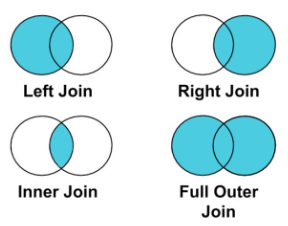

In [195]:
# Example Dataframe

# ข้อมูลพนักงาน 
employee_data = {
    'Employee_ID': [1, 2, 3, 4, 5],
    'Name': ['Alice Wonder', 'Bob Maley', 'Charlie Chep', 'David Back', 'Eva Oliver'],
    'Age': [25, 30, 35, 40, 22],
    'Salary': [50000, 60000, 70000, 80000, 40000],
    'Department_ID': [101, 102, 101, 103, 102]
}

df61 = pd.DataFrame(employee_data) # ข้อมูลพนักงาน 

# ข้อมูลแผนก
departments = pd.DataFrame({
    'Department_ID': [101, 102, 103, 104],
    'Department_Name': ['HR', 'Finance', 'IT', 'Marketing'],
    'Manager': ['John', 'Sarah', 'James', 'Laura']
})

df62 = pd.DataFrame(departments) # ข้อมูลแผนก


In [197]:
# Inner Join
merged_df_inner = pd.merge(df61, df62, on='Department_ID', how='inner')

# left Join
merged_df_left  = pd.merge(df61, df62, on='Department_ID', how='left' )

# right Join
merged_df_right = pd.merge(df61, df62, on='Department_ID', how='right')

# outer Join
merged_df_outer = pd.merge(df61, df62, on='Department_ID', how='outer')


In [225]:
#### BONUS ####

# ฟังก์ชันเพื่อกำหนดระดับตำแหน่งตามเงินเดือน
def categorize_salary(salary):
    if salary > 70000:
        return 'Director'
    elif salary > 50000:
        return 'Senior'
    else:
        return 'Officer'
    

df63 = df61.copy()
df63['Level'] = df63['Salary'].apply(categorize_salary)
df63 = df63[['Employee_ID','Name','Level']]



## Merge ข้อมูล 3 Dataframe 2 ตัวแปร และทำการ เปลี่ยนชื่อคอลัมน์ พร้อม เรียงคนที่เงินเดือนเยอะสุด
merged_df61_df62_df63 = pd.merge(pd.merge(df61, df62, on=['Department_ID'], how='left'),
                           df63, on=['Employee_ID', 'Employee_ID'], how='left')

merged_df61_df62_df63 = merged_df61_df62_df63.rename(columns = {'Employee_ID':'รหัสลูกค้า' , 
                                                                'Name_x':'ชื่อลูกค้า' , 
                                                                'Age' : 'อายุ' ,
                                                                'Salary' : 'เงินเดือน' , 
                                                                'Department_ID' : 'รหัสแผนก' ,
                                                                'Department_Name' : 'ชื่อแผนก',
                                                                'Manager' : 'ชื่อผู้จัดการที่ดูแล',
                                                                'Level' : 'ระดับอาวุโส'                    
                                                                })
merged_df61_df62_df63 = merged_df61_df62_df63.loc[:, merged_df61_df62_df63.columns != 'Name_y']
merged_df61_df62_df63 = merged_df61_df62_df63.sort_values('เงินเดือน',ascending=False)
merged_df61_df62_df63

,รหัสลูกค้า,ชื่อลูกค้า,อายุ,เงินเดือน,รหัสแผนก,ชื่อแผนก,ชื่อผู้จัดการที่ดูแล,ระดับอาวุโส
3,4,David Back,40,80000,103,IT,James,Director
2,3,Charlie Chep,35,70000,101,HR,John,Senior
1,2,Bob Maley,30,60000,102,Finance,Sarah,Senior
0,1,Alice Wonder,25,50000,101,HR,John,Officer
4,5,Eva Oliver,22,40000,102,Finance,Sarah,Officer


__________________________________________________________________________________________________________________________________________________________________________________

#### 7.     Concat

concat ใน Pandas เป็นฟังก์ชันที่ใช้สำหรับการรวม DataFrame หรือ Series หลาย ๆ อันเข้าด้วยกันในแนวตั้ง (vertical) หรือแนวนอน (horizontal) ซึ่งช่วยให้สามารถรวมข้อมูลจากหลายแหล่งได้อย่างง่ายดาย ฟังก์ชันนี้มีประโยชน์อย่างมากเมื่อต้องการรวมข้อมูลจากหลาย ๆ ไฟล์ หรือเมื่อมีข้อมูลที่ถูกแยกออกเป็นหลายส่วนและต้องการรวมเข้าด้วยกันเพื่อการวิเคราะห์

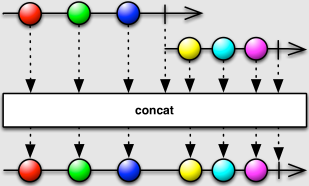

In [233]:
# Example Dataframe

df71 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

df72 = pd.DataFrame({
    'ID': [4, 2, 3],
    'Name': ['David', 'Eva', 'Frank'],
    'Salary': [50000, 60000, 70000]  # คอลัมน์ 'Salary' ที่ไม่มีใน df1
})

In [236]:
# การรวม DataFrame ในแนวตั้ง
df_concat_ver = pd.concat([df71, df72], ignore_index=True)
df_concat_ver

,ID,Name,Age,Salary
0,1,Alice,25.0,NaN
1,2,Bob,30.0,NaN
2,3,Charlie,35.0,NaN
3,4,David,NaN,50000.0
4,2,Eva,NaN,60000.0
5,3,Frank,NaN,70000.0


In [235]:
# การรวม DataFrame ในแนวนอน
df_concat_hor = pd.concat([df71, df72], axis=1,ignore_index=True)
df_concat_hor

,0,1,2,3,4,5
0,1,Alice,25,4,David,50000
1,2,Bob,30,2,Eva,60000
2,3,Charlie,35,3,Frank,70000


__________________________________________________________________________________________________________________________________________________________________________________

#### 8.     Grouping

การทำ Grouping ใน Pandas คือกระบวนการจัดกลุ่มข้อมูลตามค่าของคอลัมน์หนึ่งหรือหลายคอลัมน์เพื่อให้สามารถทำการวิเคราะห์หรือสรุปข้อมูลตามกลุ่มนั้นได้ ซึ่งทำได้โดยใช้ฟังก์ชัน groupby() ของ Pandas แบ่งเป็น 
1. basic grouping โดยใช้ฟังก์ชัน unique()
2. Aggregation Grouping คำนวณทางสถิติ เช่น ค่าเฉลี่ย, ผลรวม, จำนวน ฯลฯ ของแต่ละกลุ่ม
3. Multiple Aggregation Functions Grouping ใช้หลายฟังก์ชัน aggregation พร้อมกันได้ด้วยการใช้ agg():

In [244]:
# Example Data

# ดึงข้อมูลจาก Chapter 6 BONUS
df8 = merged_df61_df62_df63
df8

,รหัสลูกค้า,ชื่อลูกค้า,อายุ,เงินเดือน,รหัสแผนก,ชื่อแผนก,ชื่อผู้จัดการที่ดูแล,ระดับอาวุโส
3,4,David Back,40,80000,103,IT,James,Director
2,3,Charlie Chep,35,70000,101,HR,John,Senior
1,2,Bob Maley,30,60000,102,Finance,Sarah,Senior
0,1,Alice Wonder,25,50000,101,HR,John,Officer
4,5,Eva Oliver,22,40000,102,Finance,Sarah,Officer


In [252]:
# 8.1 basic grouping
unique_department = df8['ชื่อแผนก'].unique()
unique_department

array(['IT', 'HR', 'Finance'], dtype=object)

In [254]:
# 8.2 Aggregation Grouping
group_department = df8.groupby('ชื่อแผนก')
average_salary = group_department['เงินเดือน'].mean()
average_salary

ชื่อแผนก
Finance    50000
HR         60000
IT         80000
Name: เงินเดือน, dtype: int64

In [265]:
# 8.3 Multiple Aggregation Functions Grouping

## ต้องการอยากทราบว่า ผู้จัดการแต่ละคนดูแล พนักงานกี่ท่าน ผลรวมของเงินเดือนเหล่านั้น เท่าไร แต่อายุใครมากที่สุด
group_manager = df8.groupby('ชื่อผู้จัดการที่ดูแล')
agg_result = group_manager.agg({
                        'ชื่อลูกค้า' : 'count',
                        'เงินเดือน': ['sum'],
                        'อายุ': 'max',
                        })
agg_result['ชื่อพนักงาน'] = group_manager['ชื่อลูกค้า'].apply(list).values
agg_result

,ชื่อลูกค้า,เงินเดือน,อายุ,ชื่อพนักงาน
,count,sum,max,
ชื่อผู้จัดการที่ดูแล,,,,
James,1,80000,40,[David Back]
John,2,120000,35,"[Charlie Chep, Alice Wonder]"
Sarah,2,100000,30,"[Bob Maley, Eva Oliver]"


__________________________________________________________________________________________________________________________________________________________________________________

#### 9.     Time series

การจัดการข้อมูลที่มีลำดับเวลาเป็นแกนหลัก โดยทั่วไป Time Series คือชุดข้อมูลที่ถูกจัดเก็บหรือบันทึกไว้ตามเวลาหรือช่วงเวลา เช่น ราคาหุ้นที่ถูกบันทึกทุกวัน ยอดขายสินค้าที่ถูกบันทึกทุกเดือน หรืออุณหภูมิที่ถูกบันทึกทุกชั่วโมง

คุณสมบัติหลักของข้อมูล Time Series:
1. ลำดับเวลา: ข้อมูล Time Series มีลำดับเวลาชัดเจน ซึ่งทำให้เราสามารถวิเคราะห์แนวโน้ม (Trend), ฤดูกาล (Seasonality), และการเปลี่ยนแปลงแบบสุ่ม (Random fluctuations) ได้
2. Index เวลา: ใน Pandas, Time Series มักจะมี DatetimeIndex เป็นตัวแทนของเวลาในแต่ละข้อมูล เช่น วันที่, เดือน, หรือปี

##### 9.1 การจัดการข้อมูล วัน-เดือน-ปี     

In [544]:
# Example Dataframe สำหรับการจัดการข้อมูล แบบ "Date" 

# สร้างช่วงเวลา ภายในปี 2024 จะได้ทั้งหมด 366 record
date_range = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')

# สร้าง Dictionary ข้อมูลอุณหภูมิสุ่ม แยกเป็น 4 สถานี 4 ช่วงเวลา
temperature_data = {
    'Date': date_range,
    'Temperature': np.random.normal(loc=25, scale=10, size=len(date_range))  # อุณหภูมิเฉลี่ย 20 องศา
}

# สร้าง DataFrame
df91 = pd.DataFrame(temperature_data)
df91.head()

,Date,Temperature
0,2024-01-01,43.457014
1,2024-01-02,15.527879
2,2024-01-03,39.262096
3,2024-01-04,28.414425
4,2024-01-05,27.141669


In [546]:
# 9.1.1 การแปลง จาก ปี ค.ศ เป็น พ.ศ

# set datatype
df_date_a = df91.copy()
df_date_a['Date']   = pd.to_datetime(df_date_a['Date'])

# ใช้ lambda ในการ แปลงจาก ค.ศ เป็น พ.ศ
df_date_a['Date_thai'] = df_date_a['Date'].apply(lambda x: f"{x.year + 543}-{x.month:02d}-{x.day:02d}")

df_date_a.head()

,Date,Temperature,Date_thai
0,2024-01-01,43.457014,2567-01-01
1,2024-01-02,15.527879,2567-01-02
2,2024-01-03,39.262096,2567-01-03
3,2024-01-04,28.414425,2567-01-04
4,2024-01-05,27.141669,2567-01-05


In [547]:
# 9.1.2 การปรับ format วันที่ จาก YYYY-MM-DD ไปเป็น DD/MM/YYYY

# set datatype
df_date_b = df91.copy()
df_date_b['Date']   = pd.to_datetime(df_date_b['Date'])

df_date_b['Formatted Date'] = df_date_b['Date'].dt.strftime('%d/%m/%Y')
df_date_b.head()

,Date,Temperature,Formatted Date
0,2024-01-01,43.457014,01/01/2024
1,2024-01-02,15.527879,02/01/2024
2,2024-01-03,39.262096,03/01/2024
3,2024-01-04,28.414425,04/01/2024
4,2024-01-05,27.141669,05/01/2024


In [548]:
# 9.1.3 การ บวก-ลบวัน

# set datatype
df_date_c = df91.copy()
df_date_c['Date']   = pd.to_datetime(df_date_c['Date'])


# บวก หรือ ลบ 10 วัน
df_date_c['Date 10 Days'] = df_date_c['Date'] + pd.DateOffset(days=10)

# บวก หรือ ลบ 2 เดือน
df_date_c['Date 2 Months'] = df_date_c['Date'] + pd.DateOffset(months=2)

# บวก หรือ ลบ 1 ปี
df_date_c['Date 1 Year'] = df_date_c['Date'] + pd.DateOffset(years=1)

df_date_c.head()

,Date,Temperature,Date 10 Days,Date 2 Months,Date 1 Year
0,2024-01-01,43.457014,2024-01-11,2024-03-01,2025-01-01
1,2024-01-02,15.527879,2024-01-12,2024-03-02,2025-01-02
2,2024-01-03,39.262096,2024-01-13,2024-03-03,2025-01-03
3,2024-01-04,28.414425,2024-01-14,2024-03-04,2025-01-04
4,2024-01-05,27.141669,2024-01-15,2024-03-05,2025-01-05


In [549]:
# 9.1.4 การหาระยะห่างของ Date จาก End_date - Start_date  จาก ข้อ 9.1.3

df_date_c['Diff Date between 10 Days'] = df_date_c['Date 10 Days'] - df_date_c['Date']
df_date_c['Diff Date between 2 Months'] = df_date_c['Date 2 Months'] - df_date_c['Date']
df_date_c['Diff Date between 1 Year'] = df_date_c['Date 1 Year'] - df_date_c['Date']
df_date_c.head()




,Date,Temperature,Date 10 Days,Date 2 Months,Date 1 Year,Diff Date between 10 Days,Diff Date between 2 Months,Diff Date between 1 Year
0,2024-01-01,43.457014,2024-01-11,2024-03-01,2025-01-01,10 days,60 days,366 days
1,2024-01-02,15.527879,2024-01-12,2024-03-02,2025-01-02,10 days,60 days,366 days
2,2024-01-03,39.262096,2024-01-13,2024-03-03,2025-01-03,10 days,60 days,366 days
3,2024-01-04,28.414425,2024-01-14,2024-03-04,2025-01-04,10 days,60 days,366 days
4,2024-01-05,27.141669,2024-01-15,2024-03-05,2025-01-05,10 days,60 days,366 days


##### 9.2 การจัดการข้อมูล แบบเวลา

In [558]:
# Example Dataframe สำหรับการจัดการข้อมูล แบบ "Timestamp" 

event_time = {
    'Event': ['Event A', 'Event B', 'Event C', 'Event D'],
    'Start Time': ['01/08/2567 08:00:00', '02/08/2567 10:15:00', '03/08/2567 14:30:00', '04/08/2567 09:00:00'],
    'End Time'  : ['01/08/2567 12:00:00', '02/08/2567 12:45:00', '03/08/2567 17:00:00', '04/08/2567 11:00:00']
}
df92 = pd.DataFrame(event_time)
df92

,Event,Start Time,End Time
0,Event A,01/08/2567 08:00:00,01/08/2567 12:00:00
1,Event B,02/08/2567 10:15:00,02/08/2567 12:45:00
2,Event C,03/08/2567 14:30:00,03/08/2567 17:00:00
3,Event D,04/08/2567 09:00:00,04/08/2567 11:00:00


In [601]:
# 9.2.1 การจัด Format ให้ได้ มาตราฐานทั่วไป

# set datatype
df_event_time = df92.copy()


# ฟังก์ชันแปลงปีพุทธศักราชเป็นคริสต์ศักราช โดยนำ String Medthod กับ Function มาช่วย
def convert_thai_to_eng(date_str):
    date_part, time_part = date_str.split(' ')
    day, month, year = map(int, date_part.split('/'))
    year -= 543
    gregorian_date_str = f"{year:04d}-{month:02d}-{day:02d} {time_part}"
    return pd.to_datetime(gregorian_date_str, format='%Y-%m-%d %H:%M:%S')

# แปลงวันที่ใน DataFrame
df_event_time['Start Time Use'] = df_event_time['Start Time'].apply(convert_thai_to_eng)
df_event_time['End Time Use'] = df_event_time['End Time'].apply(convert_thai_to_eng)

df_event_time = df_event_time[['Event','Start Time Use','End Time Use']]

df_event_time

,Event,Start Time Use,End Time Use
0,Event A,2024-08-01 08:00:00,2024-08-01 12:00:00
1,Event B,2024-08-02 10:15:00,2024-08-02 12:45:00
2,Event C,2024-08-03 14:30:00,2024-08-03 17:00:00
3,Event D,2024-08-04 09:00:00,2024-08-04 11:00:00


In [602]:
# 9.2.2 การ บวก ลบ ช่วงเวลา
df_event_time['Start Plus 2 Hours'] = df_event_time['Start Time Use'] + pd.Timedelta(hours=2)
df_event_time['Start Minus 30 Minutes'] = df_event_time['Start Time Use'] + pd.Timedelta(minutes=30)
df_event_time

,Event,Start Time Use,End Time Use,Start Plus 2 Hours,Start Minus 30 Minutes
0,Event A,2024-08-01 08:00:00,2024-08-01 12:00:00,2024-08-01 10:00:00,2024-08-01 08:30:00
1,Event B,2024-08-02 10:15:00,2024-08-02 12:45:00,2024-08-02 12:15:00,2024-08-02 10:45:00
2,Event C,2024-08-03 14:30:00,2024-08-03 17:00:00,2024-08-03 16:30:00,2024-08-03 15:00:00
3,Event D,2024-08-04 09:00:00,2024-08-04 11:00:00,2024-08-04 11:00:00,2024-08-04 09:30:00


In [605]:
# 9.2.3 การคำนวณช่วงเวลา Duration 

df_event_time['Duration'] =  df_event_time['End Time Use'] - df_event_time['Start Plus 2 Hours']

# แปลง Duration เป็นเวลาแบบ HH:MM:SS
df_event_time['Duration Time'] = df_event_time['Duration'].apply(lambda x: str(x).split()[2] if 'days' in str(x) else str(x))


df_event_time

,Event,Start Time Use,End Time Use,Start Plus 2 Hours,Start Minus 30 Minutes,Duration,Duration Time
0,Event A,2024-08-01 08:00:00,2024-08-01 12:00:00,2024-08-01 10:00:00,2024-08-01 08:30:00,0 days 02:00:00,02:00:00
1,Event B,2024-08-02 10:15:00,2024-08-02 12:45:00,2024-08-02 12:15:00,2024-08-02 10:45:00,0 days 00:30:00,00:30:00
2,Event C,2024-08-03 14:30:00,2024-08-03 17:00:00,2024-08-03 16:30:00,2024-08-03 15:00:00,0 days 00:30:00,00:30:00
3,Event D,2024-08-04 09:00:00,2024-08-04 11:00:00,2024-08-04 11:00:00,2024-08-04 09:30:00,0 days 00:00:00,00:00:00


In [606]:
# 9.2.4 แปลงจากวันเป็นเวลา Date to Timestamp

# นับรายชั่วโมง
df_event_time['Duration Hours'] = df_event_time['Duration'].dt.total_seconds() / 3600

# นับรายนาที
df_event_time['Duration Minutes'] = df_event_time['Duration'].dt.total_seconds() / 60

# นับรายวินาที
df_event_time['Duration Seconds'] = df_event_time['Duration'].dt.total_seconds()


df_event_time

,Event,Start Time Use,End Time Use,Start Plus 2 Hours,Start Minus 30 Minutes,Duration,Duration Time,Duration Hours,Duration Minutes,Duration Seconds
0,Event A,2024-08-01 08:00:00,2024-08-01 12:00:00,2024-08-01 10:00:00,2024-08-01 08:30:00,0 days 02:00:00,02:00:00,2.0,120.0,7200.0
1,Event B,2024-08-02 10:15:00,2024-08-02 12:45:00,2024-08-02 12:15:00,2024-08-02 10:45:00,0 days 00:30:00,00:30:00,0.5,30.0,1800.0
2,Event C,2024-08-03 14:30:00,2024-08-03 17:00:00,2024-08-03 16:30:00,2024-08-03 15:00:00,0 days 00:30:00,00:30:00,0.5,30.0,1800.0
3,Event D,2024-08-04 09:00:00,2024-08-04 11:00:00,2024-08-04 11:00:00,2024-08-04 09:30:00,0 days 00:00:00,00:00:00,0.0,0.0,0.0


__________________________________________________________________________________________________________________________________________________________________________________

#### 10.     Ploting

การทำ plotting หรือการสร้างกราฟใน Pandas เป็นเครื่องมือที่ช่วยในการวิเคราะห์และแสดงข้อมูลในรูปแบบกราฟต่างๆ ซึ่งทำให้เข้าใจข้อมูลได้ง่ายขึ้น ยกตัวอย่างการ plot แบบง่าย ดังนี้

In [150]:
# Example Dataframe สำหรับการ "Ploting"
np.random.seed(0)
df10 = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=15, freq='D'),
    'Category': np.random.choice(['A', 'B', 'C', 'D'], size=15),
    'Value': np.random.randint(10, 100, size=15),
    'Count': np.random.randint(1, 50, size=15),
    'Size': np.random.randint(100, 2000, size=15)
})

10.1 Line Plot:

- แสดงข้อมูลในรูปแบบเส้นที่เชื่อมต่อระหว่างจุดต่างๆ
- ใช้เมื่อมีข้อมูลที่มีลำดับเวลา (time series) หรือการเปลี่ยนแปลงตามลำดับ
- ใช้ df.plot(kind='line')

<AxesSubplot:title={'center':'Line Plot'}, xlabel='Date'>

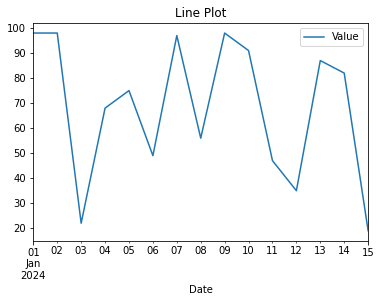

In [155]:
df_line = df10.copy()

df_line.plot(x='Date', y='Value', kind='line', title='Line Plot')

10.2 Bar Plot:

- แสดงข้อมูลในรูปแบบของแท่งที่มีความสูงแตกต่างกัน
- ใช้เพื่อเปรียบเทียบค่าระหว่างหมวดหมู่
- ใช้ df.plot(kind='bar')

<AxesSubplot:title={'center':'Bar Plot'}, xlabel='Category'>

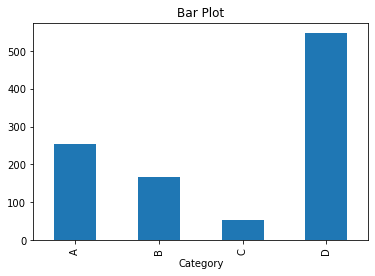

In [160]:
df_bar = df10.copy()

df_bar = df_bar.groupby('Category')['Value'].sum()

df_bar.plot(x='Category', y='Value', kind='bar', title='Bar Plot')


10.3 Horizontal Bar Plot:

- คล้ายกับ Bar Plot แต่แท่งจะอยู่ในแนวนอน
- ใช้ df.plot(kind='barh')

<AxesSubplot:title={'center':'Horizontal Bar Plot'}, ylabel='Category'>

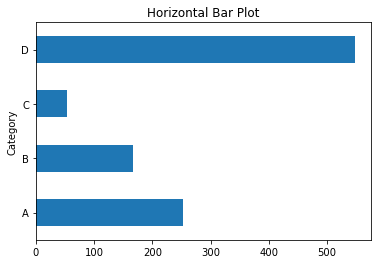

In [161]:
df_barh = df10.copy()

df_barh.groupby('Category')['Value'].sum().plot(kind='barh', title='Horizontal Bar Plot')


10.4 Histogram:

- แสดงการแจกแจงของข้อมูลโดยใช้แท่ง (bins) เพื่อแสดงความถี่
- ใช้เพื่อวิเคราะห์การกระจายของข้อมูล
- ใช้ df.plot(kind='hist')

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

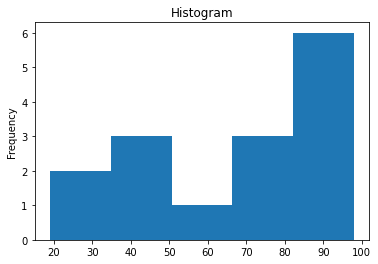

In [164]:
df_hist = df10.copy()

df_hist['Value'].plot(kind='hist', bins=5, title='Histogram')


10.5 Box Plot:

- แสดงสถิติพื้นฐานของข้อมูล เช่น median, quartiles, และ outliers
- ใช้เพื่อวิเคราะห์ความกระจายและค่าผิดปกติของข้อมูล
- ใช้ df.plot(kind='box')

<AxesSubplot:title={'center':'Box Plot'}>

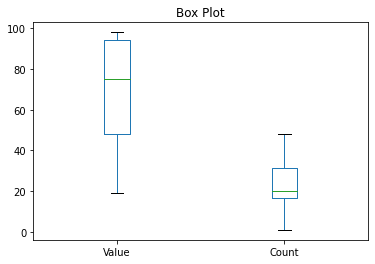

In [169]:
df_box = df10.copy()

df_box[['Value', 'Count']].plot(kind='box', title='Box Plot')


10.6 Area Plot:

- คล้ายกับ Line Plot แต่พื้นที่ใต้เส้นจะถูกเติมเต็มด้วยสี
- ใช้เพื่อแสดงการเปลี่ยนแปลงของข้อมูลในช่วงเวลาหรือหมวดหมู่
- ใช้ df.plot(kind='area')

<AxesSubplot:title={'center':'Area Plot'}, xlabel='Date'>

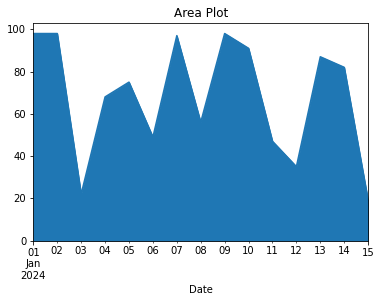

In [170]:
df_area = df10.copy()

df_area.set_index('Date')['Value'].plot(kind='area', title='Area Plot')


10.7 Scatter Plot:

- แสดงความสัมพันธ์ระหว่างสองตัวแปรโดยใช้จุด
- ใช้เพื่อค้นหาความสัมพันธ์หรือแนวโน้มระหว่างข้อมูล
- ใช้ df.plot(kind='scatter', x='column1', y='column2')

<AxesSubplot:title={'center':'Scatter Plot'}, xlabel='Value', ylabel='Count'>

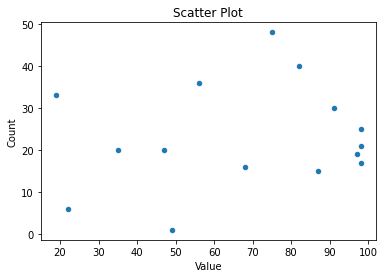

In [172]:
df_scatter = df10.copy()

df_scatter.plot(kind='scatter', x='Value', y='Count', title='Scatter Plot')


10.8 Pie Chart:

- แสดงส่วนแบ่งของข้อมูลในรูปแบบวงกลม
- ใช้เพื่อดูส่วนแบ่งและการเปรียบเทียบส่วนต่างๆ ของข้อมูล
- ใช้ df.plot(kind='pie', y='column')

<AxesSubplot:title={'center':'Pie Chart'}, ylabel='Value'>

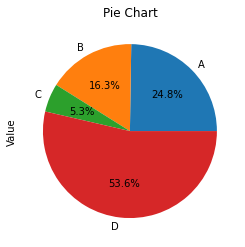

In [180]:
df_pie = df10.copy()

df_pie.groupby('Category')['Value'].sum().plot(kind='pie', title='Pie Chart', autopct='%1.1f%%')


__________________________________________________________________________________________________________________________________________________________________________________

#### 11.     Read File

การใช้ pandas สำหรับการอ่านไฟล์ (read_file) เป็นกระบวนการที่ทำให้เราสามารถนำเข้าข้อมูลจากแหล่งต่างๆ มาทำงานใน DataFrame ของ pandas ซึ่งเป็นโครงสร้างข้อมูลที่ใช้สำหรับการจัดการและวิเคราะห์ข้อมูลใน Python โดยมีรูปแบบทั่วไปสำหรับการ Read_file ดังนี้
1. อ่านไฟล์ CSV 
2. อ่านไฟล์ Excel
3. อ่านไฟล์ JSON
4. อ่าน GIS file ** ***Bonus***

##### 11.1 อ่านไฟล์ CSV 
ไฟล์ CSV (Comma-Separated Values) เป็นรูปแบบไฟล์ที่ใช้จัดเก็บข้อมูลในรูปแบบตาราง โดยมีลักษณะดังนี้:
- แถว (Rows): แต่ละแถวแสดงข้อมูลหนึ่งบันทึก
- คอลัมน์ (Columns): ข้อมูลในแต่ละแถวแบ่งออกเป็นคอลัมน์ โดยใช้คอมม่า (,) หรือ delimiter อื่นๆ
- หัวข้อคอลัมน์ (Header Row): แถวแรกอาจมีชื่อคอลัมน์
- ค่าข้อความ: ใช้เครื่องหมายคำพูดห่อหุ้มเมื่อมีคอมม่าในข้อมูล เช่น "Los Angeles, CA"
- ค่าตัวเลข: ไม่ต้องใช้เครื่องหมายคำพูด
- encoding : ประเทศไทยนิยมใช้ UTF-8 เนื่องจากรองรับหลายภาษา เป็นมาตราฐานสากล รองรับสัญลักษณ์พิเศษได้เยอะ ใช้พื้นที่น้อย

> ข้อมูลจุดตัดทางรถไฟ จาก Opendata กรมขนส่งทางราง ที่มา : https://drt.gdcatalog.go.th/dataset/drt2566_04

In [4]:
# URL ของไฟล์ CSV : ข้อมูลจุดตัดทางรถไฟ จาก Opendata กรมขนส่งทางราง
url111 = 'https://drt.gdcatalog.go.th/dataset/8a6b2e9c-bc42-40f4-8f76-cdbb9ddc7ea7/resource/01b609ab-b91c-401a-a776-8b2d0753caf3/download/drt2566-updated.csv'

# อ่านไฟล์ CSV จาก URL
df111 = pd.read_csv(url101, encoding='utf-8')

# รายละเอียดข้อมูลทั้งหมด
df111.head()

,id,sta,crossing_type_1,no_track,km_1,telegraph_1,km2,telegraph_2,road,no_road,...,equip_3,equip_4,equip_5,equip_6,equip_7,equip_8,equip_9,crossing_type_2,TM,Note
0,1,11-0001+187,Over Pass,3,1,2,1,3,ถ.พระราม 1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Over Pass,NaN,NaN
1,2,11-0002+160,ยกเลิก,3,2,2,2,3,ถ.ยมราช,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ยกเลิก,NaN,NaN
2,3,11-0002+170,ก.0,3,2,3,2,4,ถ.ยมราช,NaN,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,ก.0,"6,482,853",NaN
3,4,11-0002+867,ก.0,3,2,15,2,16,ถ.ศรีอยุธยา,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,ก.0,"4,404,608",NaN
4,5,11-0003+459,ทางลักผ่าน,3,3,9,3,10,ถ.หลังโรงพยาบาลรามาธิบดี,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ทางลักผ่าน,NaN,NaN


##### 11.2 อ่านไฟล์ excel 
ไฟล์ Excel (.xlsx) เป็นรูปแบบไฟล์ที่ใช้ในการจัดเก็บข้อมูลในตารางแบบสเปรดชีต โดยมีลักษณะดังนี้:
- แผ่นงาน (Sheets): ประกอบด้วยแผ่นงานหลายแผ่นภายในไฟล์เดียว
- เซลล์ (Cells): ข้อมูลจะถูกจัดเก็บในเซลล์ที่จัดเรียงในแถวและคอลัมน์
- ฟอร์มูล่า (Formulas): สนับสนุนการคำนวณด้วยสูตรและฟังก์ชัน
- รูปแบบ (Formatting): สามารถปรับแต่งรูปแบบเซลล์ เช่น ตัวอักษร, สี, และกรอบ
- engine='openpyxl': ใช้ engine openpyxl สำหรับไฟล์ .xlsx. ถ้าเป็นไฟล์ .xls, คุณอาจต้องใช้ engine='xlrd'

> ข้อมูลอุบัติเหตุบนโครงข่ายรถไฟ จาก Opendata การทางรถไฟแห่งประเทศไทย ที่มา : https://gdc.railway.co.th/dataset/after28

In [131]:
 # URL ของไฟล์ Excel : ข้อมูลอุบัติเหตุบนโครงข่ายรถไฟ จาก Opendata การทางรถไฟแห่งประเทศไทย
url112 = 'https://gdc.railway.co.th/dataset/17b28430-a9fc-4c80-9616-a7dad23b76b1/resource/18f4b3af-d750-4756-aeb6-e0e4422ce438/download/after28.xlsx'

# อ่านไฟล์ Excel จาก URL
df112 = pd.read_excel(url112, sheet_name='Reorder Attributes', engine='openpyxl')

# รายละเอียดข้อมูลทั้งหมด
df112.head()

,ลำดับ,ขบวน,วันที่,เวลา,สทล.,สถานที่เกิดเหตุ,รายละเอียด,บาดเจ็บ,เสียชีวิต,จังหวัด
0,1,44,01/01/2565,03:58,NaN,หนองหิน - ประจวบฯ,ขบวนรถชนสุนัข เป็นเหตุให้ รถ กซข.ป. 2544 คันที...,0,0,ประจวบคีรีขันธ์
1,2,71,01/01/2565,05:52,448/10,กะโดนค้อ - ศีขรภูมิ,ขบวนรถชนกระบือ 1 ตัว ไม่พบเจ้าของ ขบวนรถถอยกลั...,0,0,สุรินทร์
2,3,518,01/01/2565,11:25,564/7,หนองตะไก้ - หนองขอนกว้าง,รถจักรยานยนต์ ไม่ติดแผ่นป้ายทะเบียน ชนคานกั้นถ...,0,1,อุดรธานี
3,4,352,02/01/2565,05:33,64/13,บ้านโป่ง - ชท.หนองปลาดุก,ขบวนรถชนคนเป็นชาย ไม่พบหลักฐานแสดงตน อายุประมา...,0,1,ราชบุรี
4,5,171,02/01/2565,11:00,ย่าน,รือเสาะ,ขณะทำขบวนรถเข้าทางหลีก รถ บนท.ป.1073 คันที่ 1...,0,0,นราธิวาส


##### 11.3 อ่านไฟล์ JSON 
ไฟล์ JSON (JavaScript Object Notation) มีลักษณะดังนี้:
- โครงสร้างแบบคู่คีย์-ค่า: ข้อมูลจะถูกจัดเก็บในรูปแบบของคู่คีย์-ค่า (key-value pairs)
- รูปแบบ: สามารถมีค่าหลายประเภท เช่น string, number, boolean, array, หรือ object
- รองรับข้อมูลที่ซ้อนกัน: อนุญาตให้มีการซ้อนข้อมูล เช่น objects ซ้อนกันภายใน arrays
- การจัดรูปแบบ: ใช้เครื่องหมาย {} สำหรับ objects และ [] สำหรับ arrays
- ตัวอย่าง ดังนี้





```
{
  "name": "John",
  "age": 30,
  "is_student": false,
  "courses": ["Math", "Science"],
  "address": {
    "street": "123 Main St",
    "city": "Anytown"
  }
}
```

> ข้อมูลอุทกภัยและแจ้งเตือนอุทกภัยและประเมินความเสียหาย จาก Opendata กระทรวงคมนาคม ที่มา : https://dataportal.drr.go.th/dataset/fms2_flood

In [7]:
import requests

# URL ของไฟล์ Json : ข้อมูลอุทกภัยและแจ้งเตือนอุทกภัยและประเมินความเสียหาย จาก Opendata กระทรวงคมนาคม
url113 = 'http://dataportal.drr.go.th/dataset/187480f0-45e9-433f-9964-909cab4f5289/resource/a87bcef5-c3c6-4c0b-b86b-5fc2f1934277/download/flood.json'
response = requests.get(url113)
# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON content
    data113 = response.json()
else:
    print("Failed to fetch the JSON data.")

# อ่านไฟล์ JSON จาก URL
df113 = pd.DataFrame(data113)

# รายละเอียดข้อมูลทั้งหมด
df113.head()

,FLOOD
0,"{'ID': 1549, 'FLOOD_ID': 31306, 'TITLE': 'น้ำท..."
1,"{'ID': 1550, 'FLOOD_ID': 31309, 'TITLE': 'น้ำท..."
2,"{'ID': 1551, 'FLOOD_ID': 31311, 'TITLE': 'น้ำท..."
3,"{'ID': 1552, 'FLOOD_ID': 31310, 'TITLE': 'น้ำท..."
4,"{'ID': 1553, 'FLOOD_ID': 31307, 'TITLE': 'น้ำท..."


> ข้อมูลอุทกภัยและแจ้งเตือนอุทกภัยและประเมินความเสียหาย จาก Opendata กระทรวงคมนาคม ที่มา : https://dataportal.drr.go.th/dataset/fms2_flood

##### 11.4 *Bonus* อ่าน GIS File 
GIS (Geographic Information System) files เก็บข้อมูลทางภูมิศาสตร์และข้อมูลที่เกี่ยวข้องในรูปแบบที่สามารถนำมาวิเคราะห์และแสดงผลในระบบ GIS ได้ โดยทั่วไปจะเก็บในรูปแบบของ ```the_geom``` ประกอบด้วยรูปแบบ ดังนี้



- Well-Known Text (WKT) : 
  - รูปแบบ: ข้อความ (string) ที่ใช้สำหรับแสดงข้อมูลทางภูมิศาสตร์ในรูปแบบที่อ่านได้ง่าย
  - ตัวอย่าง: POINT(30 10), LINESTRING(30 10, 10 30, 40 40), POLYGON((30 10, 40 40, 20 40, 10 20, 30 10))


- Well-Known Binary (WKB)
  - รูปแบบ: ข้อมูลไบนารีที่ใช้สำหรับแสดงข้อมูลทางภูมิศาสตร์ในรูปแบบที่เป็นมาตรฐานและประหยัดพื้นที่ในการจัดเก็บ
  - ตัวอย่าง: 0102000020E6100000D20000001CDDA5CD6B7E594011E (ในรูปแบบไบนารี)

- GeoJSON 
  - รูปแบบ: รูปแบบ JSON ที่ใช้สำหรับแสดงข้อมูลทางภูมิศาสตร์ในรูปแบบที่สามารถอ่านได้ง่าย
  - ตัวอย่าง 
    ```
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [30, 10]
      },
      "properties": {
        "name": "Sample Point"
      }
    }  
    ```
- KML (Keyhole Markup Language) 
  - รูปแบบ: XML-based format ที่ใช้ในการจัดเก็บข้อมูลทางภูมิศาสตร์ซึ่งใช้โดย Google Earth
  - ตัวอย่าง
    ```
    <Placemark>
      <Point>
        <coordinates>30,10</coordinates>
      </Point>
    </Placemark>
    ```
- ESRI
  - รูปแบบ: รูปแบบไฟล์ที่ประกอบด้วยหลายไฟล์ เช่น .shp, .shx, .dbf, และอื่นๆ ซึ่งใช้สำหรับจัดเก็บข้อมูลทางภูมิศาสตร์ โดยสามารถ แปลงในรูปแบบ JSON หรือ geoJSON ตาม Supported Query Formats ได้
  - ตัวอย่าง: ข้อมูลจะถูกเก็บในไฟล์ .shp แต่ฟิลด์ the_geom จะอยู่ในรูปแบบของไบนารี (Well-Known Binary (WKB))

> เส้นทางรถไฟในประเทศไทย (ปรับปรุงล่าสุด 18 มิถุนายน ค.ศ. 2021) จาก OpenDevelopmentแม่น้ำโขง ที่มา : https://data.opendevelopmentmekong.net/th/dataset/thailand-railway-network

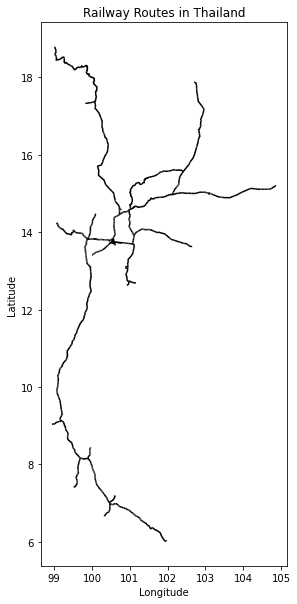

In [3]:
#11.4_1 Well-Known Binary (WKB)


################# ขั้นตอนที่ 1 Load ข้อมูลมาใส่ Dataframe

# URL ของ GIS File อยู่ในรูปแบบ Well-Known Binary (WKB) : เส้นทางรถไฟในประเทศไทย (ปรับปรุงล่าสุด 18 มิถุนายน ค.ศ. 2021) จาก OpenDevelopmentแม่น้ำโขง
url114_1 = "https://data.opendevelopmentmekong.net/th/datastore/dump/1bac90a0-846b-4934-8cd3-dd3e7387bc77"

# อ่านไฟล์ CSV จาก URL และแปลงเป็น Dataframe
df114_1 = pd.read_csv(url114_1, encoding='utf-8')

################# ขั้นตอนที่ 2 ปรับโครงสร้างข้อมูล จาก Well-Known Binary เป็น geometry

import geopandas as gpd
from shapely import wkb
import binascii

# Function to convert WKB to shapely geometry
def wkb_to_geometry(wkb_hex):
    # Convert from hex to binary
    wkb_bin = binascii.unhexlify(wkb_hex)
    return wkb.loads(wkb_bin)

# Convert 'the_geom' column from WKB to geometries
df114_1['geometry'] = df114_1['the_geom'].apply(wkb_to_geometry)

# Create a GeoDataFrame
gdf114_1 = gpd.GeoDataFrame(df114_1, geometry='geometry')

# Set the CRS (Coordinate Reference System)
gdf114_1.set_crs(epsg=4326, inplace=True)  # Assuming the data is in WGS84


################# ขั้นตอนที่ 3 แสดงตัวอย่างข้อมูล

import matplotlib.pyplot as plt

# Plot the GeoDataFrame
gdf114_1.plot(figsize=(10, 10), edgecolor='k')

# Set the title and show the plot
plt.title('Railway Routes in Thailand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

> พื้นที่มีโอกาสเกิดแผ่นดินถล่ม จาก OpenData สำนักงานสถิติแห่งชาติ ที่มา : https://gdcatalog.go.th/dataset/gdpublish-landslide_susceptibility

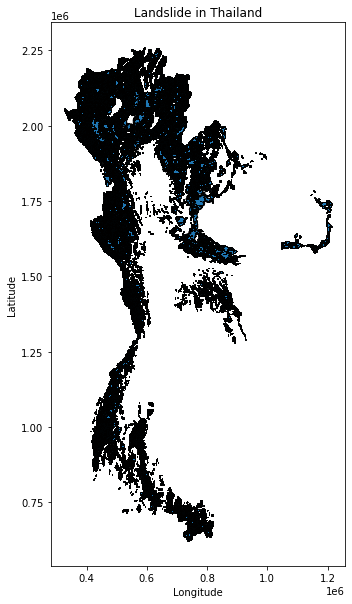

In [8]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon

#11.4_2 ESRI

################# ขั้นตอนที่ 1 Load ข้อมูลมาใส่ Dataframe

# URL ของ GIS File อยู่ในรูปแบบ ESRI mapService : พื้นที่มีโอกาสเกิดแผ่นดินถล่ม จาก Thai-GDC โดย สำนักงานสถิติแห่งชาติ
url114_2 = "https://gisportal.dmr.go.th/arcgis/rest/services/HAZARD/LANDSLIDE_SUSCEPTIBILITY/MapServer/0/query"

# กำหนดพารามิเตอร์สำหรับการ query
params = {
    'where': '1=1',  # ดึงข้อมูลทั้งหมด
    'outFields': '*',  # ดึงทุกฟิลด์
    'f': 'json',  # ระบุว่าเราต้องการข้อมูลเป็น JSON
    'resultRecordCount': 2000,  # จำนวนแถวที่ต้องการดึงแต่ละครั้ง
    'resultOffset': 0,  # ชุดข้อมูลเริ่มต้น
}

# ฟังก์ชันดึงข้อมูลทั้งหมดจาก ArcGIS REST API
def fetch_all_data(url, params):
    data = []
    offset = 0
    while True:
        params['resultOffset'] = offset  # ปรับ resultOffset สำหรับแต่ละการดึงข้อมูล
        
        # ส่ง request ไปยัง API
        response = requests.get(url, params=params)
        response_json = response.json()
        
        # ตรวจสอบว่ามีฟีเจอร์ในผลลัพธ์หรือไม่
        if 'features' in response_json and response_json['features']:
            data.extend(response_json['features'])  # เพิ่มข้อมูลใหม่ที่ดึงมา
            offset += params['resultRecordCount']  # เพิ่ม offset เพื่อดึงข้อมูลชุดถัดไป
        else:
            break  # ถ้าไม่มีฟีเจอร์ในผลลัพธ์ ให้หยุดการดึงข้อมูล
    return data

# ดึงข้อมูลจากบริการ ArcGIS REST API
data114_2 = fetch_all_data(url114_2, params.copy())



################# ขั้นตอนที่ 2 แปลงเป็น Geodataframe

# ฟังก์ชันแปลงเป็น GeoDataFrame
def convert_to_geodataframe(geometry_type, features):
    geometries = []
    attributes = []
    
    for feature in features:
        geom = feature.get('geometry')
        attr = feature.get('attributes')
        if geom:  # ตรวจสอบว่ามี geometry หรือไม่
            if geometry_type == "esriGeometryPoint":
                coords = geom.get('x'), geom.get('y')
                geometries.append(Point(coords))
            elif geometry_type == "esriGeometryPolyline":
                coords = geom.get('paths', [])[0]
                geometries.append(LineString(coords))
            elif geometry_type == "esriGeometryPolygon":
                coords = geom.get('rings', [])[0]
                geometries.append(Polygon(coords))
            attributes.append(attr)  # เก็บ attributes
    
    if geometries and attributes:
        # สร้าง DataFrame จาก attributes และ GeoDataFrame จาก geometries
        df_attributes = pd.DataFrame(attributes)
        gdf = gpd.GeoDataFrame(df_attributes, geometry=geometries)
    else:
        print("No geometries or attributes found.")
        gdf = None
    
    return gdf


# แปลงข้อมูลเป็น GeoDataFrame และตั้งค่า EPSG setting geometryType , features  >> Create a GeoDataFrame >> Set the CRS (Coordinate Reference System)
gdf114_2 = convert_to_geodataframe("esriGeometryPolygon", data114_2).set_crs(epsg=32647, inplace=True)

################# ขั้นตอนที่ 3 แสดงตัวอย่างข้อมูล

import matplotlib.pyplot as plt

# Plot the GeoDataFrame
gdf114_2.plot(figsize=(10, 10), edgecolor='k')

# Set the title and show the plot
plt.title('Landslide in Thailand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

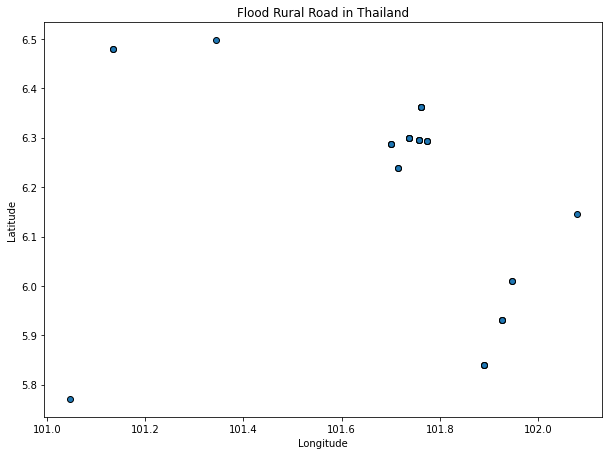

In [203]:
#11.4_3 JSON to GeoJSON to Gemometery

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

################# ขั้นตอนที่ 1 Load ข้อมูลมาใส่ Dataframe ขั้นตอนนี้อ้างอิงจาก ข้อ 11.3

# URL ของไฟล์ Json : ข้อมูลอุทกภัยและแจ้งเตือนอุทกภัยและประเมินความเสียหาย จาก Opendata กระทรวงคมนาคม
url114_3 = 'http://dataportal.drr.go.th/dataset/187480f0-45e9-433f-9964-909cab4f5289/resource/a87bcef5-c3c6-4c0b-b86b-5fc2f1934277/download/flood.json'
response = requests.get(url114_3)
# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON content
    data114_3 = response.json()
else:
    print("Failed to fetch the JSON data.")

# อ่านไฟล์ JSON จาก URL
df114_3 = pd.DataFrame(data114_3)


################# ขั้นตอนที่ 2 ปรับโครงสร้างข้อมูล โดยการแยกคอลัมน์ FLOOD เป็นคอลัมน์ย่อย และแปลงเป็น geometry
df114_3 = df114_3['FLOOD'].apply(pd.Series)

df114_3['geometry'] = df114_3.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)

# Create a GeoDataFrame
gdf114_3 = gpd.GeoDataFrame(df114_3, geometry='geometry')

# Set the CRS (Coordinate Reference System)
gdf114_3.set_crs(epsg=4326, inplace=True)  # Assuming the data is in WGS84

################# ขั้นตอนที่ 3 แสดงตัวอย่างข้อมูล

import matplotlib.pyplot as plt

# Plot the GeoDataFrame
gdf114_3.plot(figsize=(10, 10), edgecolor='k')

# Set the title and show the plot
plt.title('Flood Rural Road in Thailand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


##### สรุป Dataframe ที่รวบรวมมาได้ 


1. df111 = ข้อมูลจุดตัดทางรถไฟ จาก Opendata กรมขนส่งทางราง ที่มา : https://drt.gdcatalog.go.th/dataset/drt2566_04
2. df112 = ข้อมูลอุบัติเหตุบนโครงข่ายรถไฟ จาก Opendata การทางรถไฟแห่งประเทศไทย ที่มา : https://gdc.railway.co.th/dataset/after28
3. df113 = ข้อมูลอุทกภัยและแจ้งเตือนอุทกภัยและประเมินความเสียหาย จาก Opendata กระทรวงคมนาคม ที่มา : https://dataportal.drr.go.th/dataset/fms2_flood

------------------------------------------------------------------------------------------

4. gdf114_1 = เส้นทางรถไฟในประเทศไทย (ปรับปรุงล่าสุด 18 มิถุนายน ค.ศ. 2021) จาก OpenDevelopmentแม่น้ำโขง ที่มา : https://data.opendevelopmentmekong.net/th/dataset/thailand-railway-network
5. gdf114_2 = พื้นที่มีโอกาสเกิดแผ่นดินถล่ม จาก OpenData สำนักงานสถิติแห่งชาติ ที่มา : https://gdcatalog.go.th/dataset/gdpublish-landslide_susceptibility
6. gdf114_3 = ข้อมูลอุทกภัยและแจ้งเตือนอุทกภัยและประเมินความเสียหาย จาก Opendata กระทรวงคมนาคม ที่มา : https://dataportal.drr.go.th/dataset/fms2_flood